# Módulo 1 Sesión 1
## Comprobar que Keras y TensorFlow están instalados

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import tensorflow as tf

In [3]:
print('Keras       ', keras.__version__)
print('TensorFlow  ', tf.__version__)

Keras        2.2.4
TensorFlow   1.13.0-rc0


### Bibliotecas de ayuda

In [4]:
! pip install numpy
! pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Ver número de GPUs disponibles

In [5]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

## Ejercicio 1: Carga de datos y visualización de datos

In [6]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [7]:
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)
print("test_images shape:", test_images.shape, "test_labels shape:", test_labels.shape)

train_images shape: (60000, 28, 28) train_labels shape: (60000,)
test_images shape: (10000, 28, 28) test_labels shape: (10000,)


### Visualización de los datos

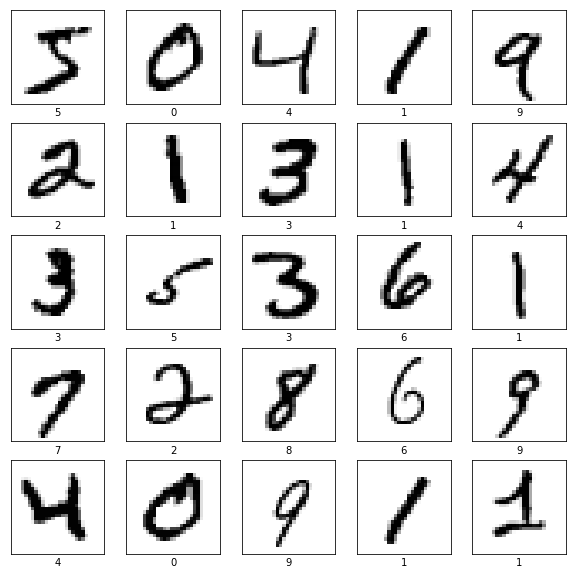

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

## Ejercicio 2: Red de neuronas básica

### Preprocesado de imágenes

Normalizar datos de [0,255] a [0,1]

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
print(f"Shape of training images {train_images.shape}")

Shape of training images (60000, 28, 28)


In [11]:
print(f"Shape of training labels {train_labels.shape}")

Shape of training labels (60000,)


### Crear red de neuronas clásica

In [12]:
# clear previos session, just in case
keras.backend.clear_session()

# create the model
shallow_model = keras.Sequential()
shallow_model.add(keras.layers.Flatten(input_shape=(28, 28)))
shallow_model.add(keras.layers.Dense(128))
shallow_model.add(keras.layers.Dense(1))

# Take a look at the model summary
shallow_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Ejercicio 3: Entrenamiento con error cuadrático medio

### Comprobar el modelo

In [13]:
shallow_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

### Entrenar el modelo

In [14]:
shallow_model.fit(train_images, train_labels, batch_size=64, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 3.8738 - mean_squared_error: 3.8738
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 3.4409 - mean_squared_error: 3.4409
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 3.3892 - mean_squared_error: 3.3892
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 3.3686 - mean_squared_error: 3.3686
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 3.3436 - mean_squared_error: 3.3436


### Error en test set

In [15]:
test_loss, test_mse = shallow_model.evaluate(test_images, test_labels)
print('Test MSE:', test_mse)

10000/10000 [==============================] - 0s 41us/step
Test MSE: 3.1811900341033934


### Calculamos la precisión del modelo

In [16]:
predictions = shallow_model.predict(test_images)
# round to integers
predictions = np.rint(predictions).astype(np.uint8).flatten()
predictions

array([6, 3, 2, ..., 8, 5, 6], dtype=uint8)

In [17]:
accuracy = (predictions == test_labels).mean()
print('Test ACC: ', accuracy)

Test ACC:  0.2118


### Visualización de los resultados 

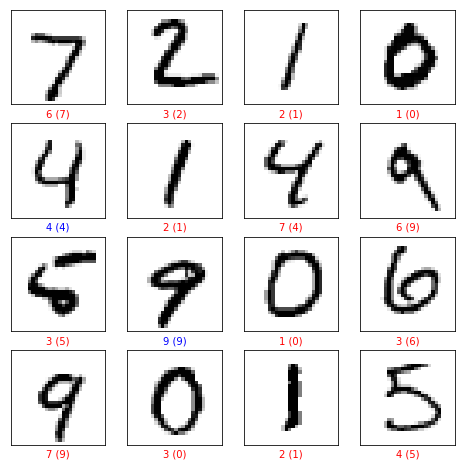

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predicted_label, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} ({})".format(predicted_label,
                              true_label),
                              color=color)
    
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, test_labels, test_images)

## Ejercicio 4: Uso de categorical cross-entropy

### Transformar las etiquetas a one hot encoding

In [19]:
from keras.utils import to_categorical

train_one_hot_labels = to_categorical(train_labels, num_classes=10)
test_one_hot_labels = to_categorical(test_labels, num_classes=10)

print(f"Shape of training labels {train_one_hot_labels.shape}")
print(f"Label {train_labels[0]} as  one_hot: {train_one_hot_labels[0]}")

Shape of training labels (60000, 10)
Label 5 as  one_hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Modelo con funciones de activación relu y softmax

In [20]:
# clear previos session, just in case
keras.backend.clear_session()

# create the model
shallow_model = keras.Sequential()
shallow_model.add(keras.layers.Flatten(input_shape=(28, 28)))
shallow_model.add(keras.layers.Dense(128, activation=tf.nn.relu))
shallow_model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

# Take a look at the model summary
shallow_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento usando categorial crossentropy y accuracy como métrica

In [21]:
shallow_model.compile(optimizer='sgd', 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [22]:
shallow_model.fit(train_images, train_one_hot_labels, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.8926 - acc: 0.7857
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.4207 - acc: 0.8879
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3506 - acc: 0.9037
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3149 - acc: 0.9124
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2914 - acc: 0.9183


### Evaluación del modelo

In [23]:
test_loss, test_acc = shallow_model.evaluate(test_images, test_one_hot_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.9241


In [24]:
predictions = shallow_model.predict(test_images)
print(f"Label {test_one_hot_labels[10]} with prediction array {predictions[10]}")

Label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] with prediction array [9.7014624e-01 4.3858836e-07 6.4115473e-03 9.3977613e-04 2.5168379e-06
 1.9580016e-02 2.9166054e-04 3.5092542e-06 2.6225941e-03 1.7130000e-06]


### Pintar las predicciones

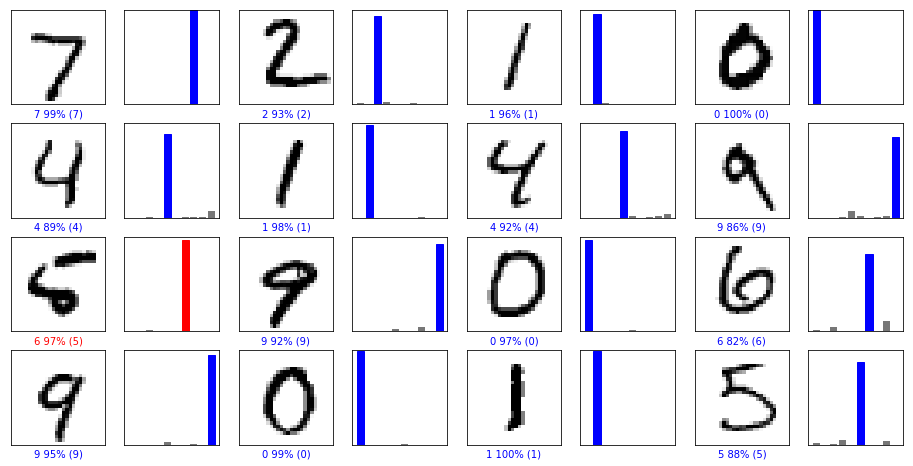

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')  
    
def plot_predictions(predictions, test_labels, test_images):
    num_rows = 4
    num_cols = 4
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions, test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, test_labels)
        
    
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
plot_predictions(predictions, test_labels, test_images)

## Ejercicio 5: Red con capas convolucionales

### Modelo con capas convolucionales

In [26]:
# clear previos session, just in case
keras.backend.clear_session()

# create the model
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                 activation='relu', input_shape=(28,28,1))) 
cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', 
                                 activation='relu'))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(256, activation='relu'))
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 6,433,898
Trainable params: 6,433,898
Non-trainable params: 0
_________________________________________________________________


### Modificar las imagenes de entrada para añadirles una dimension de 28x28 a 28x28x1

In [27]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
reshaped_train_images = train_images.reshape(train_images.shape[0], w, h, 1)
print(f"Shape of training images {reshaped_train_images.shape}")
reshaped_test_images = test_images.reshape(test_images.shape[0], w, h, 1)

Shape of training images (60000, 28, 28, 1)


### Entrenamiento

In [28]:
cnn_model.compile(optimizer='sgd', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
cnn_model.fit(reshaped_train_images, train_one_hot_labels, batch_size=8, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 35s 578us/step - loss: 0.2255 - acc: 0.9319


Incrementamos el tamaño de batch_size para ver como afecta al rendimiento

In [29]:
cnn_model.fit(reshaped_train_images, train_one_hot_labels, batch_size=128, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 65us/step - loss: 0.0792 - acc: 0.9763
Epoch 2/3
60000/60000 [==============================] - 4s 65us/step - loss: 0.0685 - acc: 0.9795
Epoch 3/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.0629 - acc: 0.9808


De 34 segundos por epoch a 4 segundos

### Evaluación del modelo

10000/10000 [==============================] - 1s 64us/step
Test accuracy: 0.9765


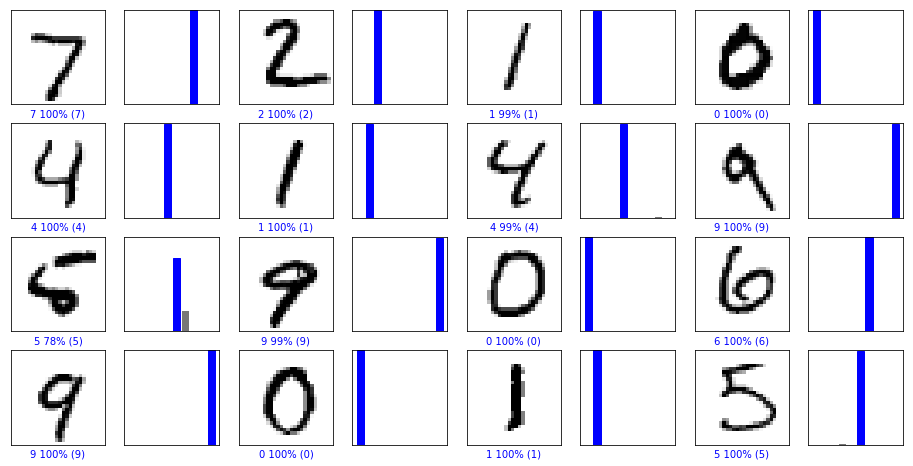

In [30]:
test_loss, test_acc = cnn_model.evaluate(reshaped_test_images, test_one_hot_labels)
print('Test accuracy:', test_acc)
predictions = cnn_model.predict(reshaped_test_images)
plot_predictions(predictions, test_labels, test_images)

## Ejercicio 6: Fashion MNIST con y sin pooling

### Descargar y preprocesar Fashion MNIST

In [31]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

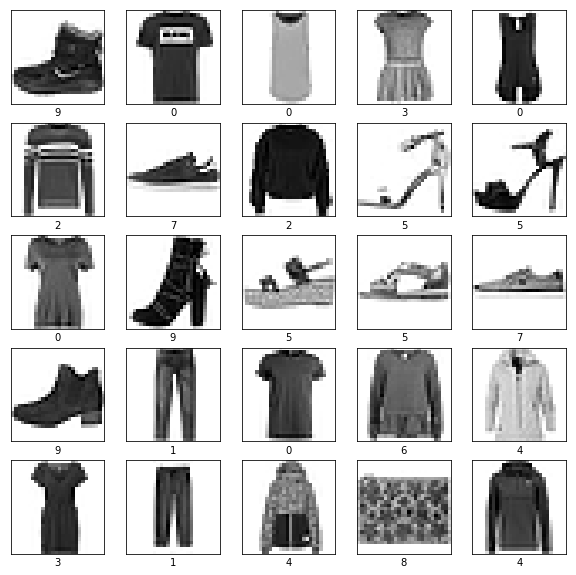

In [32]:
# Show some of the images from the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [33]:
# Normalize input from [0,255] to [0.0,1.0]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
reshaped_train_images = train_images.reshape(train_images.shape[0], w, h, 1)
reshaped_test_images = test_images.reshape(test_images.shape[0], w, h, 1)
print(f"Shape of training images {reshaped_train_images.shape}")

Shape of training images (60000, 28, 28, 1)


In [34]:
# labels to one hot encodings
train_one_hot_labels = to_categorical(train_labels, num_classes=10)
test_one_hot_labels = to_categorical(test_labels, num_classes=10)
print(f"Shape of training labels {train_one_hot_labels.shape}")
print(f"Label {train_labels[0]} as  one_hot: {train_one_hot_labels[0]}")

Shape of training labels (60000, 10)
Label 9 as  one_hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Crear modelo sin pooling

In [35]:
# clear previos session, just in case
keras.backend.clear_session()

In [36]:
# create the model
deep_model = keras.Sequential()
deep_model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                 activation='relu', input_shape=(28,28,1))) 
deep_model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', 
                                 activation='relu'))
deep_model.add(keras.layers.Flatten())
deep_model.add(keras.layers.Dense(256, activation='relu'))
deep_model.add(keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 6,433,898
Trainable params: 6,433,898
Non-trainable params: 0
_________________________________________________________________


### Crear modelo con pooling

In [37]:
# create the model
deep_model_pooling = keras.Sequential()
deep_model_pooling.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                 activation='relu', input_shape=(28,28,1))) 
deep_model_pooling.add(keras.layers.MaxPooling2D(pool_size=2))
deep_model_pooling.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', 
                                 activation='relu'))
deep_model_pooling.add(keras.layers.MaxPooling2D(pool_size=2))
deep_model_pooling.add(keras.layers.Flatten())
deep_model_pooling.add(keras.layers.Dense(256, activation='relu'))
deep_model_pooling.add(keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
deep_model_pooling.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total para

Pasamos de mas de 6,5 millones de parámetros a 0,4 millones

### Entrenar y evaluar modelo sin pooling

In [38]:
def train_and_evaluate(model):
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(reshaped_train_images, train_one_hot_labels, batch_size=128, epochs=10)
    test_loss, test_acc = model.evaluate(reshaped_test_images, test_one_hot_labels)
    print('Test accuracy:', test_acc)
    predictions = model.predict(reshaped_test_images)
    plot_predictions(predictions, test_labels, test_images)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.3876 - acc: 0.8619
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2329 - acc: 0.9151
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1710 - acc: 0.9371
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1228 - acc: 0.9555
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0849 - acc: 0.9691
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0578 - acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0350 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0257 - acc: 0.9911
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0199 - acc: 0.9935
Epoch 10/10
10000/10000 [==============================] - 1s 62us/step
Test accuracy: 0.9082


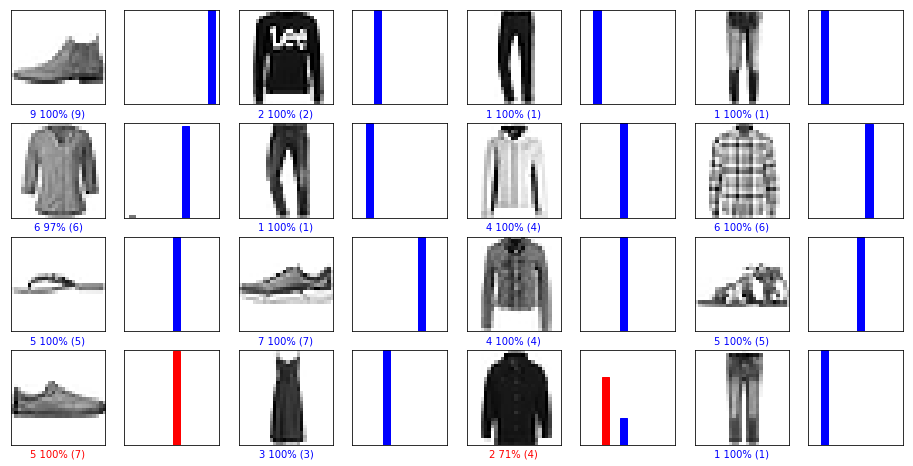

In [39]:
train_and_evaluate(deep_model)

### Entrenar y evaluar modelo con pooling

Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4806 - acc: 0.8296
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3184 - acc: 0.8857
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2759 - acc: 0.8985
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2482 - acc: 0.9090
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2237 - acc: 0.9191
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2089 - acc: 0.9223
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1907 - acc: 0.9300
Epoch 8/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1778 - acc: 0.9347
Epoch 9/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1666 - acc: 0.9377
Epoch 10/10
10000/10000 [==============================] - 1s 65us/step
Test accuracy: 0.9136


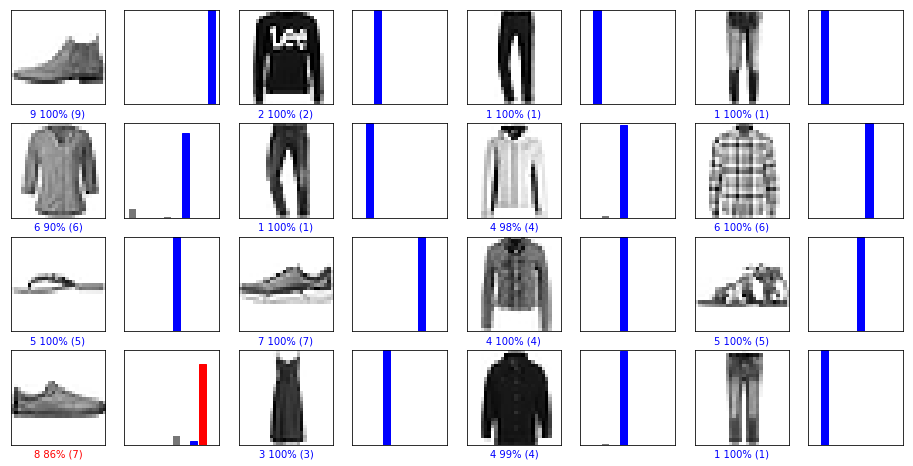

In [40]:
train_and_evaluate(deep_model_pooling)

El modelo sin pooling tiene 16 veces más paráemtros y solo mejora un 2% la precisión

## Ejercicio 7: Fashion MNIST con pooling y dropout

### Crear modelo sin dropout

In [41]:
# clear previos session, just in case
keras.backend.clear_session()

def train_and_evaluate(model, optimizer='adam', epochs=10):
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(reshaped_train_images, 
              train_one_hot_labels, 
              validation_data=(reshaped_test_images, test_one_hot_labels),
              batch_size=128, 
              epochs=epochs)
    test_loss, test_acc = model.evaluate(reshaped_test_images, test_one_hot_labels)
    print('Test accuracy:', test_acc)
    predictions = model.predict(reshaped_test_images)
    plot_predictions(predictions, test_labels, test_images)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

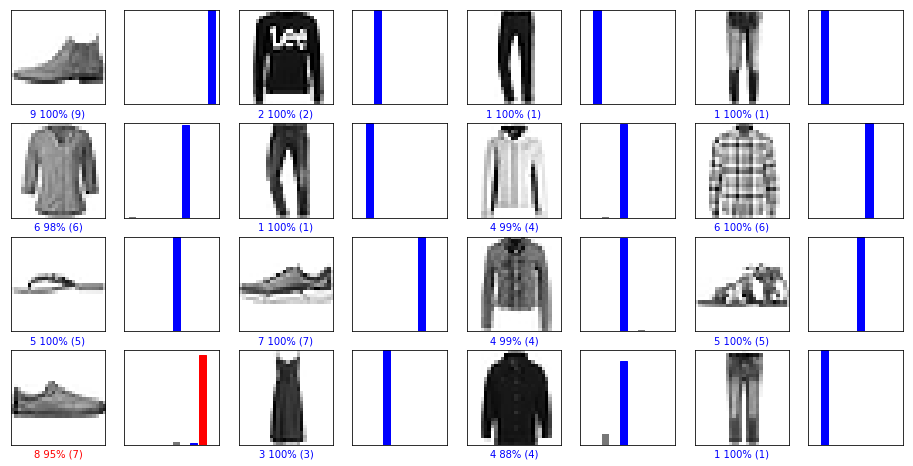

In [42]:
# create the model
deep_model = keras.Sequential()
deep_model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                   activation='relu', input_shape=(28,28,1))) 
deep_model.add(keras.layers.MaxPooling2D(pool_size=2))
deep_model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', 
                                   activation='relu'))
deep_model.add(keras.layers.MaxPooling2D(pool_size=2))
deep_model.add(keras.layers.Flatten())
deep_model.add(keras.layers.Dense(256, activation='relu'))
deep_model.add(keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
deep_model.summary()

# train and evaluate the model
train_and_evaluate(deep_model)

## Crear modelo con dropout para evitar overfitting

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
___________________________

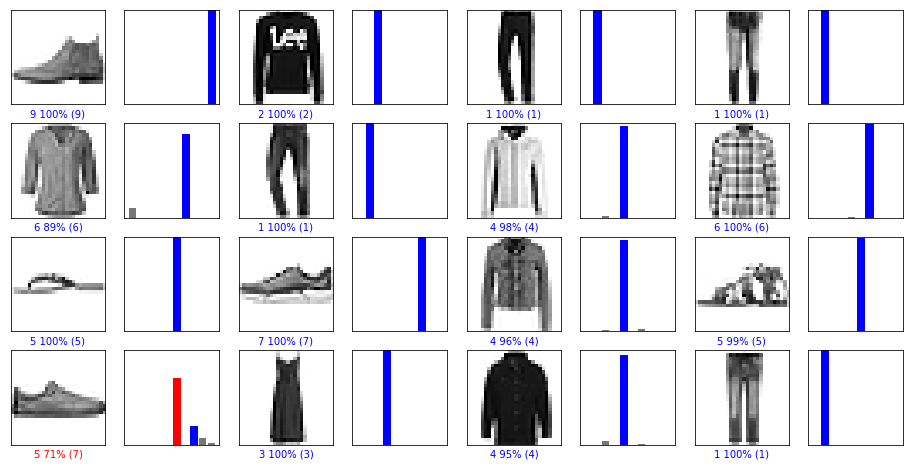

In [43]:
# create the model

def model():
    # clear previos sessi y que tiene overfittingon, just in case
    keras.backend.clear_session()
    deep_model = keras.Sequential()
    deep_model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                     activation='relu', input_shape=(28,28,1))) 
    deep_model.add(keras.layers.MaxPooling2D(pool_size=2))
    deep_model.add(keras.layers.Dropout(0.2))
    deep_model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', 
                                     activation='relu'))
    deep_model.add(keras.layers.MaxPooling2D(pool_size=2))
    deep_model.add(keras.layers.Dropout(0.2))
    deep_model.add(keras.layers.Flatten())
    deep_model.add(keras.layers.Dense(256, activation='relu'))
    deep_model.add(keras.layers.Dropout(0.2))
    deep_model.add(keras.layers.Dense(10, activation='softmax'))
    return deep_model

deep_model = model()
# Take a look at the model summary
deep_model.summary()

# train and evaluate the model
train_and_evaluate(deep_model)

Con dropout observamos que el error en test es mejor que el de train. Esto se debe a que el dropout se desactiva cuando evaluamos el modelo.

## Ejercicio 8: Entrenamiento con diferentes optimizadores 

### Momentum

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 2.3081 - acc: 0.1125 - val_loss: 2.3008 - val_acc: 0.1712
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.3027 - acc: 0.1237 - val_loss: 2.2962 - val_acc: 0.1935
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.2979 - acc: 0.1342 - val_loss: 2.2917 - val_acc: 0.2172
Epoch 4/10
60000/60000 [==============================] - 4s 58us/step - loss: 2.2926 - acc: 0.1467 - val_loss: 2.2873 - val_acc: 0.2520
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.2876 - acc: 0.1552 - val_loss: 2.2829 - val_acc: 0.2767
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 2.2823 - acc: 0.1687 - val_loss: 2.2784 - val_acc: 0.2960
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 2.2776 - acc: 0.1790 - val_loss: 2.2736 - val_acc

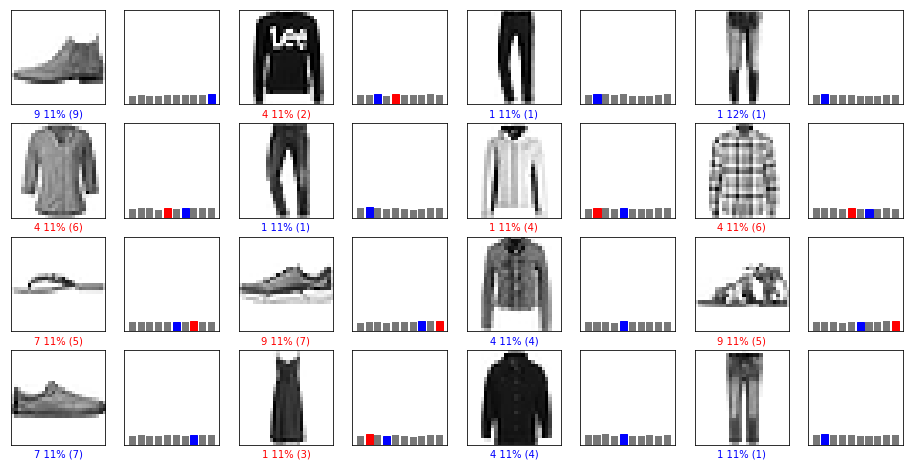

In [44]:
train_and_evaluate(model(), 
                   keras.optimizers.SGD(lr=0.0001, 
                                        decay=1e-6, 
                                        momentum=0.1, 
                                        nesterov=True),
                   epochs=10)

El modelo con este optimizador y esos meta parametros converge muy despacio.

### Adam

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.5736 - acc: 0.7892 - val_loss: 0.4004 - val_acc: 0.8579
Epoch 2/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.3770 - acc: 0.8625 - val_loss: 0.3475 - val_acc: 0.8738
Epoch 3/3
10000/10000 [==============================] - 1s 59us/step
Test accuracy: 0.888


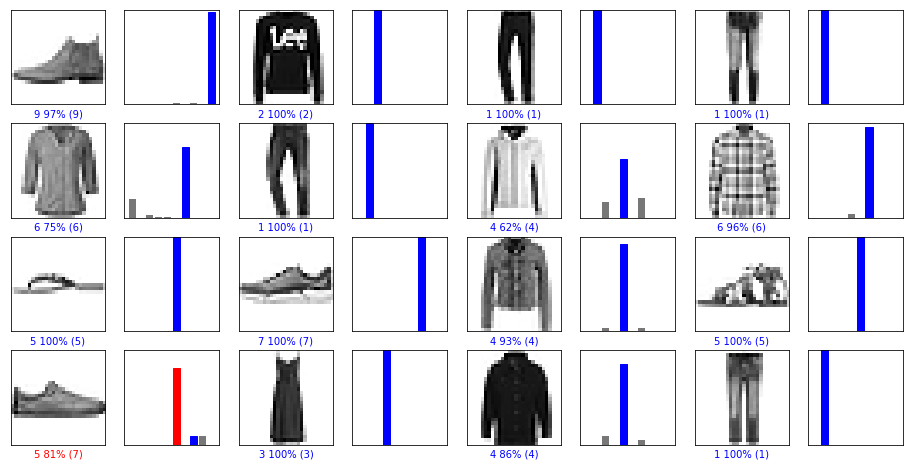

In [45]:
train_and_evaluate(model(), 
                   keras.optimizers.Adam(lr=0.001, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=None, 
                                         decay=0.0, 
                                         amsgrad=False),
                  epochs=3)